In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Breast cancer dataset

bcdata = pd.read_csv(r"Breast_cancer.csv", header=0)
bcdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Display the cancer data information

bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Display the unique values of all the variables

bcdata.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [5]:
# Use LabelEncoder for target variables

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

bcdata['diagnosis'] = LE.fit_transform(bcdata['diagnosis'])

In [6]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 10 : 1, then the dataset is imbalance data)

diagnosis_count = bcdata.diagnosis.value_counts()
print('Class 0:', diagnosis_count[0])
print('Class 1:', diagnosis_count[1])
print('Proportion:', round(diagnosis_count[0] / diagnosis_count[1], 2), ': 1')
print('Total records:', len(bcdata))

Class 0: 357
Class 1: 212
Proportion: 1.68 : 1
Total records: 569


In [7]:
# Displaying Duplicate values with in Loan ataset, if avialble

bcdata_dup = bcdata[bcdata.duplicated(keep='last')]
bcdata_dup

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [8]:
# Count the missing values by each variable, if available

bcdata.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Delte the unnamed column

del bcdata['Unnamed: 32']

In [10]:
# Identify the dependent and Target variables

IndepVar = []
for col in bcdata.columns:
    if col != 'diagnosis':
        IndepVar.append(col)

TargetVar = 'diagnosis'

x = bcdata[IndepVar]
y = bcdata[TargetVar]

In [11]:
# split into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

# Copy the test data to back-up file

x_test_bk = x_test.copy()

In [12]:
# Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [13]:
# Load the result dataset for KNN

knn_results = pd.read_csv(r"E:\SDP-2\S8\KNN_Results.csv", header=0)
knn_results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[53  1]
 [11 78]]
Outcome values : 
 53 1 11 78
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.98      0.90        54
           0       0.99      0.88      0.93        89

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.91       143
weighted avg       0.93      0.92      0.92       143

Accuracy : 91.6 %
Precision : 82.8 %
Recall : 98.1 %
F1 Score : 0.898
Specificity or True Negative Rate : 87.6 %
Balanced Accuracy : 92.8 %
MCC : 0.836
roc_auc_score: 0.929


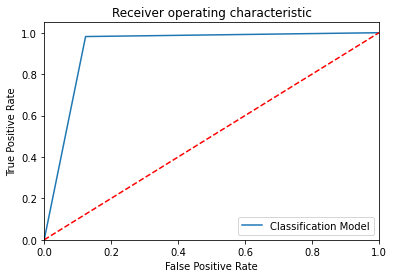

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[52  2]
 [ 3 86]]
Outcome values : 
 52 2 3 86
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.96      0.95        54
           0       0.98      0.97      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

Accuracy : 96.5 %
Precision : 94.5 %
Recall : 96.3 %
F1 Score : 0.954
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 96.4 %
MCC : 0.926
roc_auc_score: 0.965


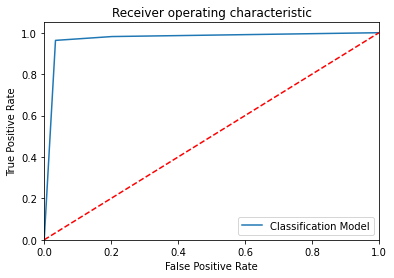

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[53  1]
 [ 5 84]]
Outcome values : 
 53 1 5 84
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95        54
           0       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8 %
Precision : 91.4 %
Recall : 98.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 96.2 %
MCC : 0.914
roc_auc_score: 0.963


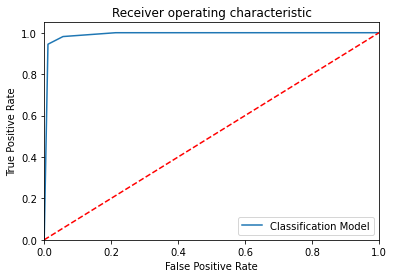

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[53  1]
 [ 4 85]]
Outcome values : 
 53 1 4 85
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.98      0.95        54
           0       0.99      0.96      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

Accuracy : 96.5 %
Precision : 93.0 %
Recall : 98.1 %
F1 Score : 0.955
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 96.8 %
MCC : 0.927
roc_auc_score: 0.968


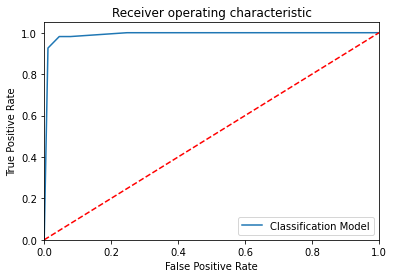

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[53  1]
 [ 5 84]]
Outcome values : 
 53 1 5 84
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95        54
           0       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8 %
Precision : 91.4 %
Recall : 98.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 96.2 %
MCC : 0.914
roc_auc_score: 0.963


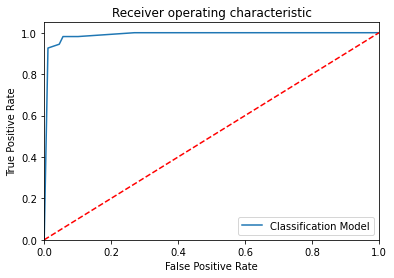

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[53  1]
 [ 5 84]]
Outcome values : 
 53 1 5 84
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95        54
           0       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8 %
Precision : 91.4 %
Recall : 98.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 96.2 %
MCC : 0.914
roc_auc_score: 0.963


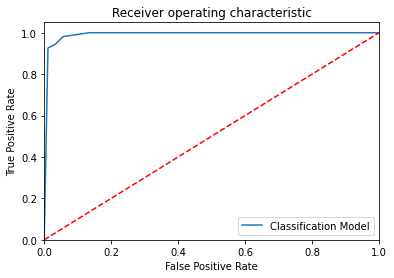

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[53  1]
 [ 5 84]]
Outcome values : 
 53 1 5 84
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95        54
           0       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8 %
Precision : 91.4 %
Recall : 98.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 96.2 %
MCC : 0.914
roc_auc_score: 0.963


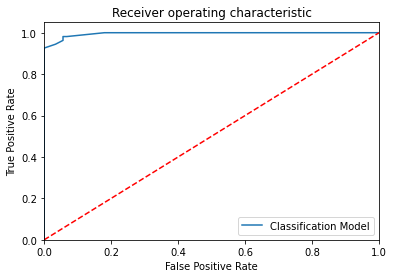

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[53  1]
 [ 5 84]]
Outcome values : 
 53 1 5 84
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95        54
           0       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8 %
Precision : 91.4 %
Recall : 98.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 96.2 %
MCC : 0.914
roc_auc_score: 0.963


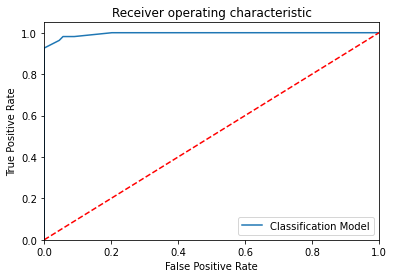

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[53  1]
 [ 5 84]]
Outcome values : 
 53 1 5 84
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.98      0.95        54
           0       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy : 95.8 %
Precision : 91.4 %
Recall : 98.1 %
F1 Score : 0.946
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 96.2 %
MCC : 0.914
roc_auc_score: 0.963


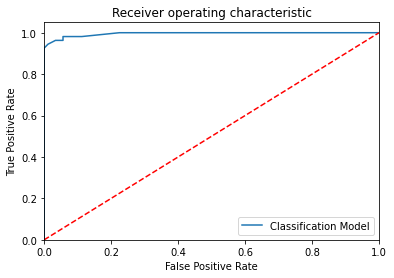

In [14]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 10, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #--------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    knn_results = knn_results.append(new_row, ignore_index=True)
    #---------------------------

In [16]:
# Write the file

knn_results.to_csv("E:\SDP-2\S8\KNN_Results1.csv")

# Display the results

knn_results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,NaN,NaN,NaN,NaN,0.916,0.828,0.981,0.898,0.876,0.836,0.928943,0.928
1,KNeighborsClassifier(n_neighbors=2),2,NaN,NaN,NaN,NaN,0.965,0.945,0.963,0.954,0.966,0.926,0.964628,0.964
2,KNeighborsClassifier(n_neighbors=3),3,NaN,NaN,NaN,NaN,0.958,0.914,0.981,0.946,0.944,0.914,0.962651,0.962
3,KNeighborsClassifier(n_neighbors=4),4,NaN,NaN,NaN,NaN,0.965,0.93,0.981,0.955,0.955,0.927,0.968269,0.968
4,KNeighborsClassifier(),5,NaN,NaN,NaN,NaN,0.958,0.914,0.981,0.946,0.944,0.914,0.962651,0.962
5,KNeighborsClassifier(n_neighbors=6),6,NaN,NaN,NaN,NaN,0.958,0.914,0.981,0.946,0.944,0.914,0.962651,0.962
6,KNeighborsClassifier(n_neighbors=7),7,NaN,NaN,NaN,NaN,0.958,0.914,0.981,0.946,0.944,0.914,0.962651,0.962
7,KNeighborsClassifier(n_neighbors=8),8,NaN,NaN,NaN,NaN,0.958,0.914,0.981,0.946,0.944,0.914,0.962651,0.962
8,KNeighborsClassifier(n_neighbors=9),9,NaN,NaN,NaN,NaN,0.958,0.914,0.981,0.946,0.944,0.914,0.962651,0.962
